# Machine Learning
### Data Science Pipeline Workshop 11 Juni 2022
- Author : Randy Galawana
- Email  : randy_galawana1@telkomsel.co.id

&copy; Telkomsel 2022

## Data Preparation

### Load Data

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/galawana/DSA_Python/master/csv/Churn_Modelling.csv'
df = pd.read_csv(url)

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Descriptive Analysis

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [3]:
# Shape 
df.shape

(10000, 14)

In [4]:
# Variable Types
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [5]:
# Check Null Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Variable Understanding

In [6]:
# Here we identify the Target variable and Predictor variable
Target_var=df['Exited']
Pred_var=df.drop(['Exited'],axis=1)

# From Pred_var we divide into 2 type, Continues and Categorical
cont=df[['RowNumber','CustomerId','CreditScore','Age','Balance','EstimatedSalary']]
cata=df[['Surname','Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]

In [7]:
#Describe Continues data
cont.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [0]:
# we will exclude RowNumber, Customerid From continues data
new_cont = df[['CreditScore','Age','Balance','EstimatedSalary']]

## Building Model Training - Supervised Learning

* Age, Geography, Geography_Germany, IsActiveMember, NumOfProduct is top 4 corelated feature to Exited parameters

In [9]:
# Extract Numerical Feature
feature_num = ['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
feature_track = ['Exited']
# Change Categorical Feature
feature_cat = ['Gender', 'Geography']

df_dummy = pd.get_dummies(df,columns = feature_cat)



In [10]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, classification_report 
from sklearn.feature_selection import SelectFromModel

X=df_dummy[feature_num + ['Gender_Female', 'Geography_France', 'Geography_Germany','Geography_Spain']]
y=df_dummy[feature_track]

### Split Data Training and Test

In [12]:
# Split Data
from sklearn.model_selection import train_test_split, cross_val_score
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

print("Train Distribution Value")
print(y_train['Exited'].value_counts(normalize=True))

print("Test Distribution Value")
print(y_test['Exited'].value_counts(normalize=True))

Train Distribution Value
0    0.797571
1    0.202429
Name: Exited, dtype: float64
Test Distribution Value
0    0.793333
1    0.206667
Name: Exited, dtype: float64


### Fit to algorithm

In [18]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 21 kB/s  eta 0:00:01


In [19]:
from xgboost import XGBClassifier

In [23]:
xgb = XGBClassifier()
clf = xgb.fit(X=X_train, y=y_train)

### Predict Test data

In [26]:
y_predict = xgb.predict(X_test)
y_predict_proba = xgb.predict_proba(X_test)

## Model Validation

### Function to create a classification matrix

In [33]:
def classification_matrix(model, X_train, X_test, y_train, y_test):
    predictions = model.predict(X_test)
    conf_mtx = confusion_matrix(y_test,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(y_test,predictions)))

    roc_auc = roc_auc_score(y_test,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(y_test, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")


 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2380
           1       0.70      0.47      0.56       620

    accuracy                           0.85      3000
   macro avg       0.79      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000

Area under ROC curve :  0.7072241799945784 



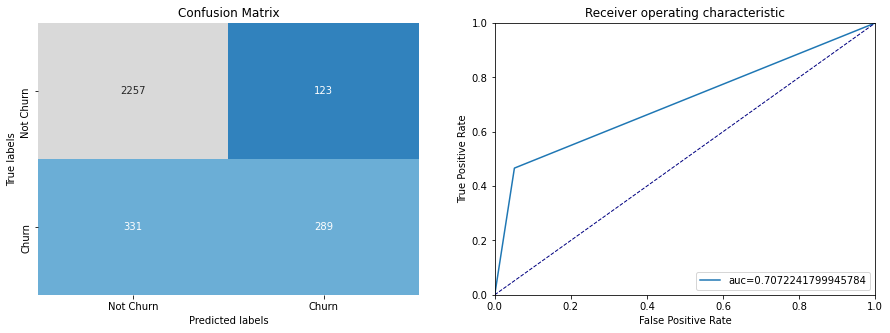

In [36]:
classification_matrix(clf, X_train, X_test, y_train, y_test)

## Model Training and Feature Selection

### Feature and Model Selection

In [37]:
# Define model used
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Function to list important features

In [39]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [40]:
def feature_importance_df(model,FITUR,k,scale):
    sns.set_context("paper", font_scale=scale)
    fitur_imp=pd.DataFrame({'fitur':FITUR,'importances':model.feature_importances_})
    fitur_imp.sort_values(by='importances',ascending=False,inplace=True)
    sns.barplot(x='importances',y='fitur',data=fitur_imp[0:k],orient='h')
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature")
    plt.show()

In [41]:
def feature_importance_accuracy(model, thresholds, X_train, X_test, y_train, y_test, model_test='XGBClassifier'):
    for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model

        if (model_test=='XGBClassifier'):
          selectionmodel=XGBClassifier()
        elif (model_test=='LogisticRegression'):
          selectionmodel = LogisticRegression(random_state = 123)
        elif (model_test=='DecisionTreeClassifier'):
          selectionmodel = DecisionTreeClassifier(random_state=123)
        elif (model_test=='RandomForestClassifier'):
          selectionmodel = RandomForestClassifier()
        elif (model_test=='AdaBoostClassifier'):
          selectionmodel = AdaBoostClassifier()
        elif (model_test=='GradientBoostingClassifier'):
          selectionmodel = GradientBoostingClassifier()
        elif (model_test=='BaggingClassifier'):
          selectionmodel = BaggingClassifier()
        else:
          selectionmodel= XGBClassifier()


        selectionmodel.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selectionmodel.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, Sensitivity: %.2f%%, ROC AUC: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0, recall*100.0, roc_auc*100.0))

#### Feature Selection XGB


In [42]:
# Feature Selection MOdel
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_threshold = np.sort(xgb.feature_importances_)

feature_importance_accuracy(xgb, xgb_threshold, X_train, X_test, y_train, y_test,'XGBClassifier')

Thresh=0.032, n=12, Accuracy: 84.87%, Sensitivity: 46.61%, ROC AUC: 70.72%
Thresh=0.033, n=11, Accuracy: 84.73%, Sensitivity: 45.97%, ROC AUC: 70.40%
Thresh=0.036, n=10, Accuracy: 84.83%, Sensitivity: 47.10%, ROC AUC: 70.88%
Thresh=0.038, n=9, Accuracy: 84.93%, Sensitivity: 47.26%, ROC AUC: 71.00%
Thresh=0.039, n=8, Accuracy: 84.50%, Sensitivity: 46.94%, ROC AUC: 70.61%
Thresh=0.040, n=7, Accuracy: 84.87%, Sensitivity: 47.74%, ROC AUC: 71.14%
Thresh=0.051, n=6, Accuracy: 84.50%, Sensitivity: 47.58%, ROC AUC: 70.85%
Thresh=0.053, n=5, Accuracy: 85.10%, Sensitivity: 49.03%, ROC AUC: 71.76%
Thresh=0.111, n=4, Accuracy: 85.03%, Sensitivity: 43.23%, ROC AUC: 69.58%
Thresh=0.121, n=3, Accuracy: 81.87%, Sensitivity: 29.68%, ROC AUC: 62.57%
Thresh=0.152, n=2, Accuracy: 81.40%, Sensitivity: 11.45%, ROC AUC: 55.54%
Thresh=0.294, n=1, Accuracy: 81.40%, Sensitivity: 11.45%, ROC AUC: 55.54%


* Best overal score for feature using XGB in XGB model is 5 fitur with Accuracy 85.1%, Recall 49.03% and ROC AUC 71.76%

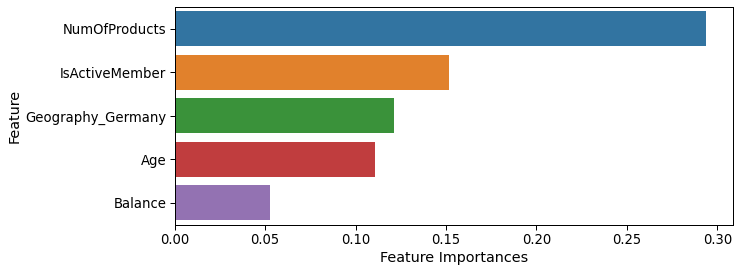

In [43]:
plt.figure(figsize=(10,4))
feature_importance_df(xgb,list(X),5,1.5)

In [44]:
xgb_feature=imp_df(X.columns,xgb.feature_importances_)[0:5]['feature']
xgb_feature

0        NumOfProducts
1       IsActiveMember
2    Geography_Germany
3                  Age
4              Balance
Name: feature, dtype: object

#### Feature selection with RandomForest

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_threshold = np.sort(rf.feature_importances_)
feature_importance_accuracy(rf, rf_threshold, X_train, X_test, y_train, y_test,'RandomForestClassifier')

Thresh=0.010, n=12, Accuracy: 85.33%, Sensitivity: 43.39%, ROC AUC: 69.82%
Thresh=0.010, n=11, Accuracy: 85.87%, Sensitivity: 46.13%, ROC AUC: 71.17%
Thresh=0.018, n=10, Accuracy: 85.80%, Sensitivity: 46.29%, ROC AUC: 71.19%
Thresh=0.019, n=9, Accuracy: 85.33%, Sensitivity: 44.84%, ROC AUC: 70.36%
Thresh=0.026, n=8, Accuracy: 85.60%, Sensitivity: 45.48%, ROC AUC: 70.77%
Thresh=0.042, n=7, Accuracy: 85.23%, Sensitivity: 42.90%, ROC AUC: 69.58%
Thresh=0.082, n=6, Accuracy: 83.40%, Sensitivity: 39.19%, ROC AUC: 67.05%
Thresh=0.129, n=5, Accuracy: 82.83%, Sensitivity: 39.19%, ROC AUC: 66.70%
Thresh=0.139, n=4, Accuracy: 79.20%, Sensitivity: 25.65%, ROC AUC: 59.40%
Thresh=0.143, n=3, Accuracy: 79.00%, Sensitivity: 27.10%, ROC AUC: 59.81%
Thresh=0.143, n=2, Accuracy: 74.50%, Sensitivity: 32.42%, ROC AUC: 58.94%
Thresh=0.238, n=1, Accuracy: 79.93%, Sensitivity: 17.26%, ROC AUC: 56.76%


* Best overal score for feature using RF in RF model is 10 fitur with Accuracy 85.8%, Recall 46.29% and ROC AUC 71.19%

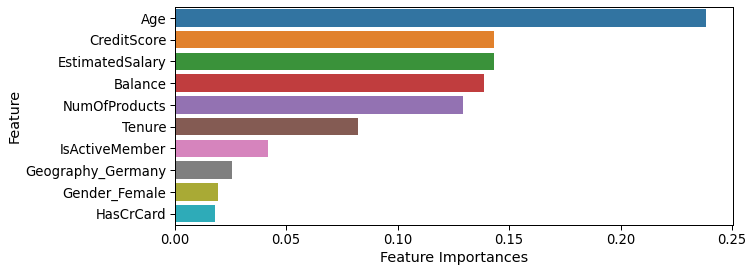

In [46]:
plt.figure(figsize=(10,4))
feature_importance_df(rf, list(X),10,1.5)

In [47]:
rf_feature=imp_df(X.columns, rf.feature_importances_)[0:10]['feature']
rf_feature

0                  Age
1          CreditScore
2      EstimatedSalary
3              Balance
4        NumOfProducts
5               Tenure
6       IsActiveMember
7    Geography_Germany
8        Gender_Female
9            HasCrCard
Name: feature, dtype: object

Feature with XGB is slightly better than feature using RF classifier

### Function to Compare between Model Score validation

In [48]:
def modeling(x,y):
    from sklearn.model_selection import StratifiedKFold
    ### DEFINE ALL MODEL used
    #linear Model
    logreg = LogisticRegression(random_state = 123)
    # Tree
    dt = DecisionTreeClassifier(random_state=123)
    #Ensemble
    randomforest = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gdc = GradientBoostingClassifier()
    bagging = BaggingClassifier()
    xgbc= XGBClassifier()
    classifiers = [logreg,dt,randomforest,bagging,ada,gdc, xgbc]
    textlabel = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'GradBoost', 'XGBoost']
    model_list = zip(classifiers,textlabel)
    for clf, label in model_list:
        scores = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123), scoring='roc_auc')
        print("AUC of ROC : %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

#### Model Selection using XGB Feature Importance

In [49]:
X_train_xgb=X_train[xgb_feature]
modeling(X_train_xgb,y_train)

AUC of ROC : 0.3455 (+/- 0.1711) [Logistic Regression]
AUC of ROC : 0.6897 (+/- 0.0183) [Decision Tree]
AUC of ROC : 0.8168 (+/- 0.0097) [Random Forest]
AUC of ROC : 0.7918 (+/- 0.0054) [Bagging]
AUC of ROC : nan (+/- nan) [AdaBoost]
AUC of ROC : 0.8650 (+/- 0.0117) [GradBoost]
AUC of ROC : 0.8435 (+/- 0.0096) [XGBoost]


#### Model Selection using RF Feature Importance

In [50]:
X_train_rf=X_train[rf_feature]
modeling(X_train_rf,y_train)

AUC of ROC : 0.6718 (+/- 0.0092) [Logistic Regression]
AUC of ROC : 0.6895 (+/- 0.0136) [Decision Tree]
AUC of ROC : 0.8521 (+/- 0.0110) [Random Forest]
AUC of ROC : 0.8172 (+/- 0.0170) [Bagging]
AUC of ROC : nan (+/- nan) [AdaBoost]
AUC of ROC : 0.8665 (+/- 0.0130) [GradBoost]
AUC of ROC : 0.8438 (+/- 0.0123) [XGBoost]


* Both RF and XGB feature is good on Gradboost and XGBoost model, so we will select Gradboost and XGBoost for further testing

### Model Comparison

In [51]:
def matrix_clasifier(y_test,predictions):
  conf_mtx = confusion_matrix(y_test,predictions)
  f, axes = plt.subplots(ncols=2, figsize=(15, 5))
  sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
  axes[0].set_xlabel('Predicted labels')
  axes[0].set_ylabel('True labels')
  axes[0].set_title('Confusion Matrix'); 
  axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
  axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

  print("\n Classification report : \n {}".format(classification_report(y_test,predictions)))

  roc_auc = roc_auc_score(y_test,predictions) 
  accuracy = accuracy_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  print("Accuracy: %.2f%%, Sensitivity: %.2f%%, ROC AUC: %.2f%%" % (accuracy*100.0, recall*100.0, roc_auc*100.0))

  fpr, tpr,_ = roc_curve(y_test, predictions)
  axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
  axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")

#### XGBoost


 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2380
           1       0.70      0.49      0.58       620

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000

Accuracy: 85.10%, Sensitivity: 49.03%, ROC AUC: 71.76%


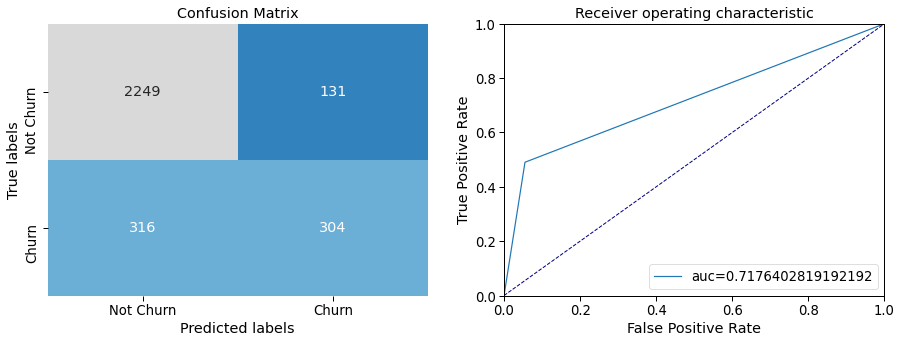

In [52]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_xgb, y_train)
X_test_xgb=X_test[xgb_feature]
predictions = model_xgb.predict(X_test_xgb)
matrix_clasifier(y_test,predictions)

#### GradBoost


 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2380
           1       0.77      0.44      0.56       620

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000

Accuracy: 85.70%, Sensitivity: 44.35%, ROC AUC: 70.41%


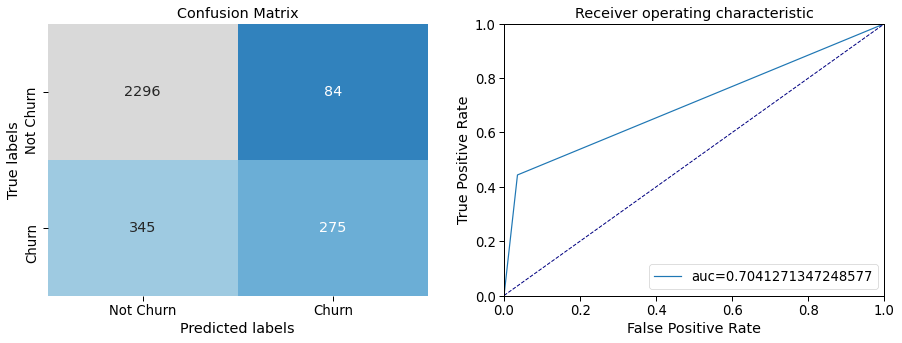

In [53]:
model_grb = GradientBoostingClassifier()

model_grb.fit(X_train_xgb, y_train)
X_test_grb=X_test[xgb_feature]
predictions_grb = model_grb.predict(X_test_xgb)
matrix_clasifier(y_test, predictions_grb)

* Gradient Boosting slighty better than XGBoost

### Model Export / Packing

In [55]:
import pickle

model_columns=list(X_test_grb.columns)
column_filename = 'columns.pkl'
pickle.dump(model_columns, open(column_filename, 'wb'))

In [56]:
filename = 'Gradboostpickle.pkl'
pickle.dump(model_grb, open(filename, 'wb'))